# 你好!

Welcome to "Machine Learning" Chinese!

## What is this about?

Not surprisingly, this tutorial is about Python, Machine Learning and Chinese. We are going to explore ways to understand and improve language learning with Python.

The tutorial is split into three sections:

* Learning Chinese vocabulary: Here we will explore text data from the web and will try to get an understanding of which words we will have to learn in order to understand everyday Chinese.
* Learning Chinese characters: Here we will look at Chinese characters and use machine learning to make learning them easier for us
* Learning Chinese pronounication: Here we will use machine learning to help us pronounce Chinese syllables better

Let's get started!

## Words, words, words

The first thing you need to do when learning a new language is to get an idea of the vocabulary

First, we need to get some data that we can work with. We are going to scrape it off the web using a Python library / tool called **Scrapy**.

Scrapy makes it easy to build and run crawlers and provides much of the functionality that makes scraping easy, like following links and parsing documents.

You can read more about Scrapy on the project's website:

http://scrapy.org/

Scrapy is designed to work as a command-line-tool, hence we will not do this part of the tutorial in the IPython notebook but rather on the command line.

We are going to use Scrapy to build crawlers for various Chinese websites.

**Let's have a look at the code of our scrapers!**

(open the **scraper** subdirectory with your favorite editor)

## Running the crawlers

Now that we understand our crawlers, we can run them using the following command:

    #run the crawler and store the result as JSON (one JSON document per line, for easy parsing)
    
    scrapy crawl wikipedia -o wikipedia.json -t jsonlines
    
This runs the Wikipedia crawlers and stores the results as JSON documents, where each result will be written as a one-line JSON document. This is useful because it makes loading the data much easier.

In [188]:
#first, let's import json and nltk libraries, which we're gonna need in a second
import gzip
import json #from the Python standard library

def load_scraped_data(filename):
    items = []
    with gzip.open(filename,'r') as input_file:
        for i,line in enumerate(input_file):
            try:
                items.append(json.loads(line))
            except:
                print("Cannot parse JSON at line {}".format(i+1,))
                pass
    return items

sites = ['wikipedia','china_daily']
        
filename = 'data/china_daily.json.gz.json.gz.json.gz'

items = load_scraped_data(filename)

In [189]:
#Let's have a look at the items...
print items[0]['text'][:200],'...'

# 扶真贫才能真脱贫

来源：人民日报

2016-07-19 14:43:45











分享

行走西海固，翻越六盘山，探访移民点，一个深切感受是：闽宁对口帮扶，帮得准，扶得实，群众的获得感强，脱贫增收的效果好。

对此，不少扶贫干部颇为自豪：“精准扶贫”这一中央提出的重要扶贫方略近年来正在各地落实，在闽宁对口帮扶的实践中，从一开始就体现了这一思想，也验证了这一思路。

集力聚资， ...


## Cleaning the data

As you can see, there are various non-chinese characters in the text. For now, we will just leave them there, as we do not want to change the ordering of characters (i.e. if we had "媒：习" and we'd remove the "：", the two characters would appear in a sequence, which will distort our later analyses).

In [190]:
from collections import defaultdict
import numpy as np

def get_ngram_distribution(text,n=2):
    distribution=defaultdict(lambda: 0)
    for i in range(len(text)-n+1):
        #we are only interested in non-ascii characters here...
        t=text[i:i+n]
        if all([ord(c) > 255 for c in t]):
            distribution[t]+=1
    return distribution

def remove_ngrams(text,ngrams):
    for ngram in ngrams:
        while text.find(ngram) != -1:
            i=text.find(ngram)
            substr = text[i:i+len(ngram)]
            j=i
            while j > 0 and text[j:j+len(ngram)] in ngrams:
                j-=1
            k=i
            while k < len(text)-len(ngram) and text[k:k+len(ngram)] in ngrams:
                k+=1
            text = text[:j]+text[k+len(ngram):]
    return text
            
def remove_common_ngrams(items,threshold=0.5,n=3):
    full_text = ' '.join([item['text'] for item in items])
    ngram_distribution = get_ngram_distribution(full_text,n=n)
    common_ngrams = {''.join(v[0]) for v in sorted(ngram_distribution.items(),key=lambda x:-x[1]) if v[1] > threshold*len(items)}
    for item in items:
        item['text']=remove_ngrams(item['text'],common_ngrams)
    return common_ngrams

removed_ngrams=remove_common_ngrams(items,n=6,threshold=0.05)

In [191]:
from collections import defaultdict

def get_character_distribution(text):
    distribution = defaultdict(lambda: 0)
    for character in text:
        #we are only interested in non-ascii characters here...
        if ord(character) > 255:
            distribution[character]+=1
    return distribution

full_text = ' '.join([item['text'] for item in items])
character_distribution = get_character_distribution(full_text)

In [192]:
sorted_character_distribution = sorted(character_distribution.items(), key=lambda x: -x[1])
print '\n'.join([u'{}: {}'.format(c[0],c[1]) for c in sorted_character_distribution[:100]])

一: 167105
，: 157472
页: 132254
的: 110461
上: 82976
下: 74006
。: 70759
国: 65470
、: 50301
中: 48231
在: 31577
”: 30317
“: 30276
是: 29370
人: 28996
和: 28198
大: 25035
发: 24812
不: 22659
会: 22399
了: 22016
新: 21917
有: 21903
年: 21489
要: 20891
为: 19840
民: 18847
作: 18439
党: 17130
展: 16746
全: 16427
网: 16300
经: 15587
出: 15382
主: 15104
家: 15043
业: 14983
成: 14792
实: 14450
对: 14326
日: 14304
行: 14249
政: 13959
来: 13738
：: 13706
理: 13181
进: 13146
个: 13129
力: 13035
法: 12955
时: 12704
方: 12402
这: 12397
我: 12319
动: 12147
地: 12055
平: 12048
重: 11855
生: 11727
学: 11650
强: 11509
关: 11508
工: 11505
以: 11267
多: 10853
合: 10814
体: 10638
化: 10556
能: 10365
到: 10363
部: 10196
们: 10190
建: 10164
同: 10156
开: 10097
分: 10057
海: 10000
现: 9845
月: 9461
自: 9442
于: 9276
就: 9215
与: 9199
制: 9093
事: 9044
产: 9038
长: 8962
面: 8898
定: 8880
过: 8705
济: 8675
高: 8660
信: 8638
共: 8637
创: 8607
习: 8606
推: 8541
治: 8533
问: 8477
领: 8304


* 中 (zhong1): middle (e.g. 中国 (zhong1 guo2): China [middle country])
* 国 (guo2): country
* 上 (shang4): above

## Exercicse

---

Print the 100 least used characters!

---

## Plotting the frequencies

Now, we want to visualize the word frequency data. We are going to use Matplotlib for this.

For this, we import the "pylab" package from matplotlib, which provides everything we need
for our plotting needs and has an interface that is similar to Matlab (in case you should still know that ;))

In [193]:
from matplotlib import pylab 

We also will use numpy, which is a library that provides great tools for working with numerical data.

In [194]:
import numpy as np

In [195]:
#we prepare the data

#the X values
X = np.arange(len(sorted_character_distribution))

#the character frequency values
frequencies = np.array([c[1] for c in sorted_character_distribution],dtype=np.float64)
frequencies = frequencies/np.sum(frequencies)

In [350]:
#this is some magic code to tell matplotlib to plot this inline
%matplotlib inline

#here we increase the font size
from matplotlib import rc
rc('font', size=20)

[]

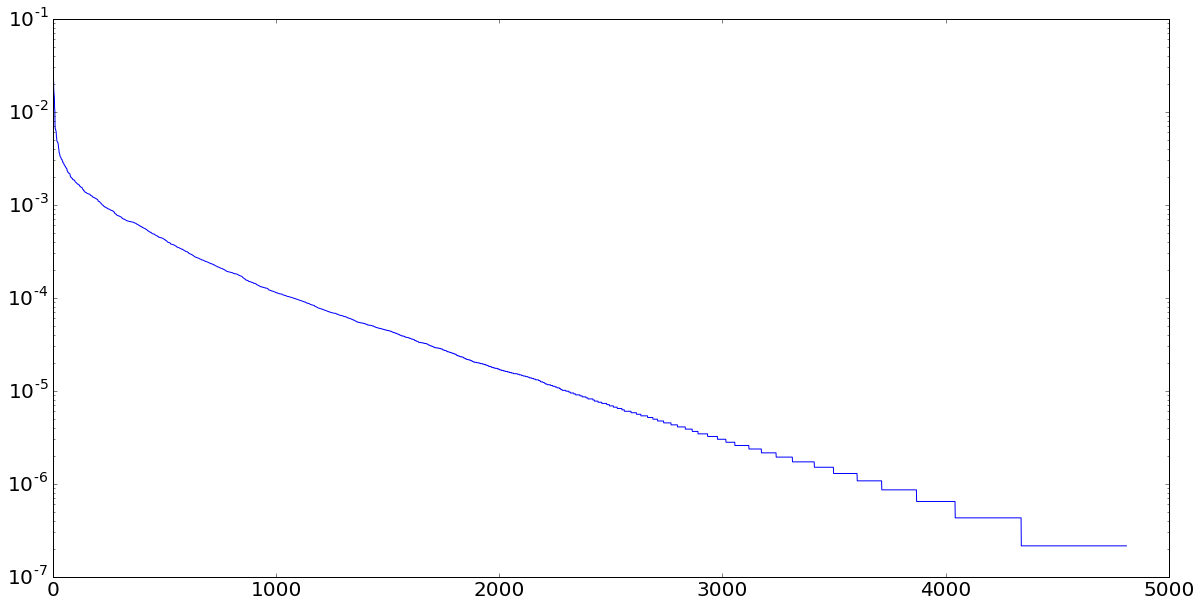

In [196]:
pylab.figure(figsize=(20,10))
pylab.plot(X,frequencies)
pylab.semilogy()

In [197]:
import scipy.optimize
import numpy as np

def model(x,a,b,c):
    return -x**b*c+a

popt_p, pcov_p = scipy.optimize.curve_fit(model, X, np.log(frequencies),[0.03,0.5,0.1])

print "Optimal parameters:",popt_p

print pcov_p

Optimal parameters: [-5.62633963  0.69072771  0.02834226]
[[  1.48244069e-04  -2.05109635e-05   5.28253740e-06]
 [ -2.05109635e-05   3.40860859e-06  -8.61249785e-07]
 [  5.28253740e-06  -8.61249785e-07   2.18095285e-07]]


Now let's plot the resulting fit with the original data.

[]

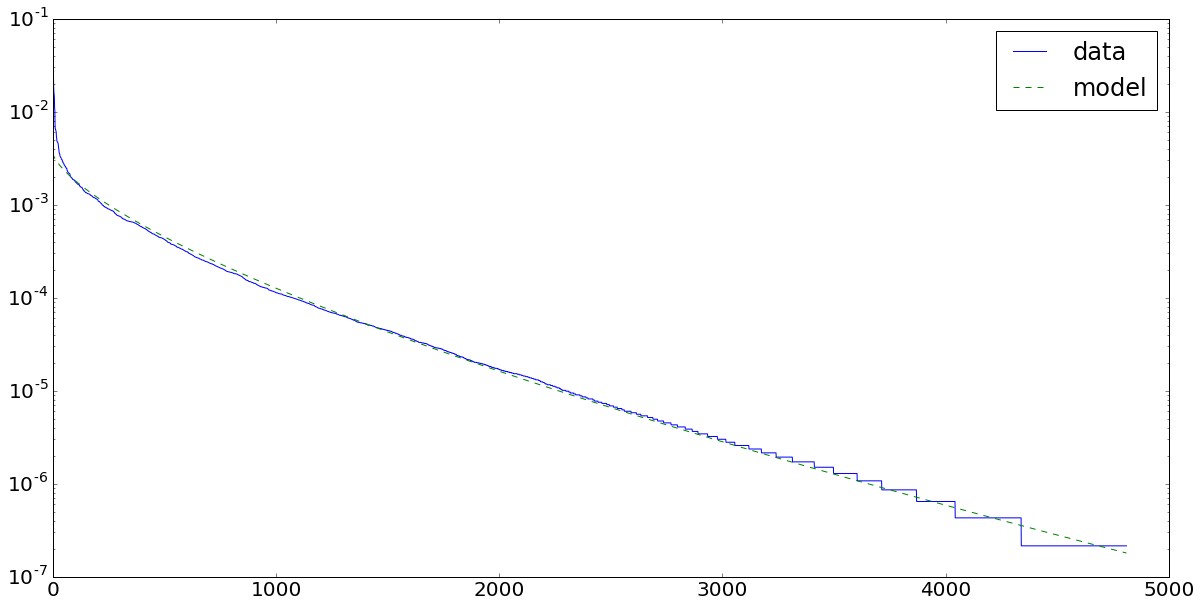

In [198]:
pylab.figure(figsize=(20,10))
pylab.plot(X,frequencies)
pylab.plot(X,np.exp(model(X,*popt_p)),ls='--')
pylab.legend(['data','model'])
pylab.semilogy()

(0, 1)

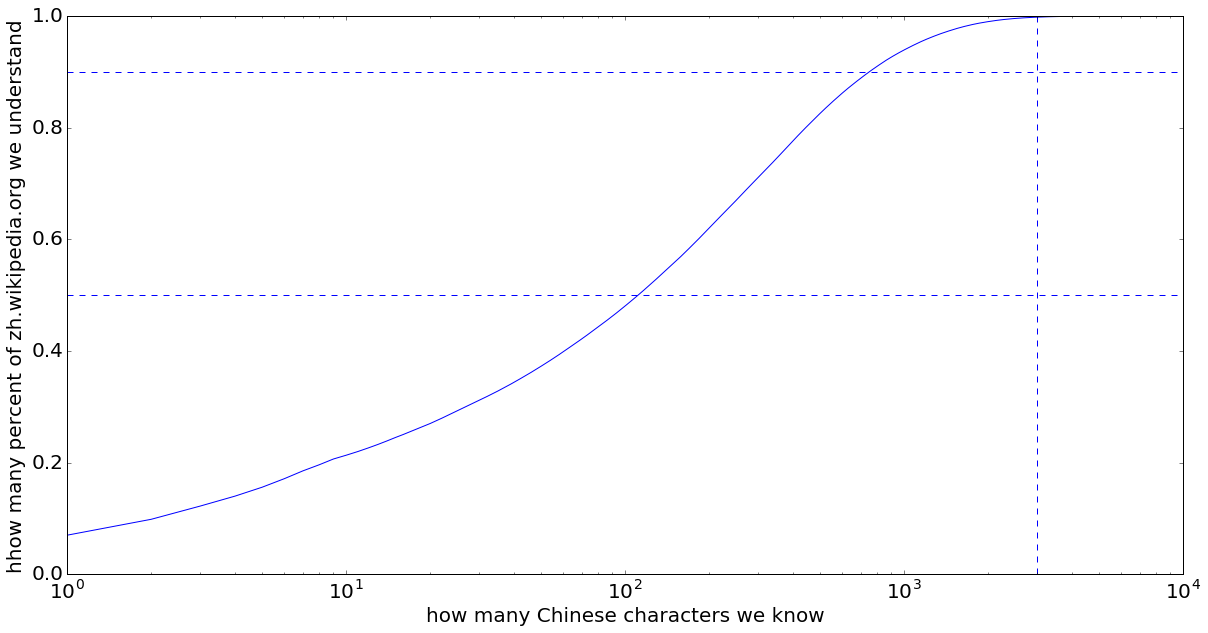

In [199]:
pylab.figure(figsize=(20,10))
pylab.plot(X,np.cumsum(frequencies))
pylab.semilogx()
pylab.xlabel('how many Chinese characters we know')
pylab.ylabel('hhow many percent of zh.wikipedia.org we understand')
pylab.axhline(0.5,ls='--')
pylab.axhline(0.9,ls='--')
pylab.axvline(3000,ls='--')
pylab.ylim(0,1)

In [200]:
def cdf_model(x,a,b,c):
    t = np.sum(np.exp(model(x,a,b,c)))
    return np.cumsum(np.exp(model(x,a,b,c)))/t

(0, 1)

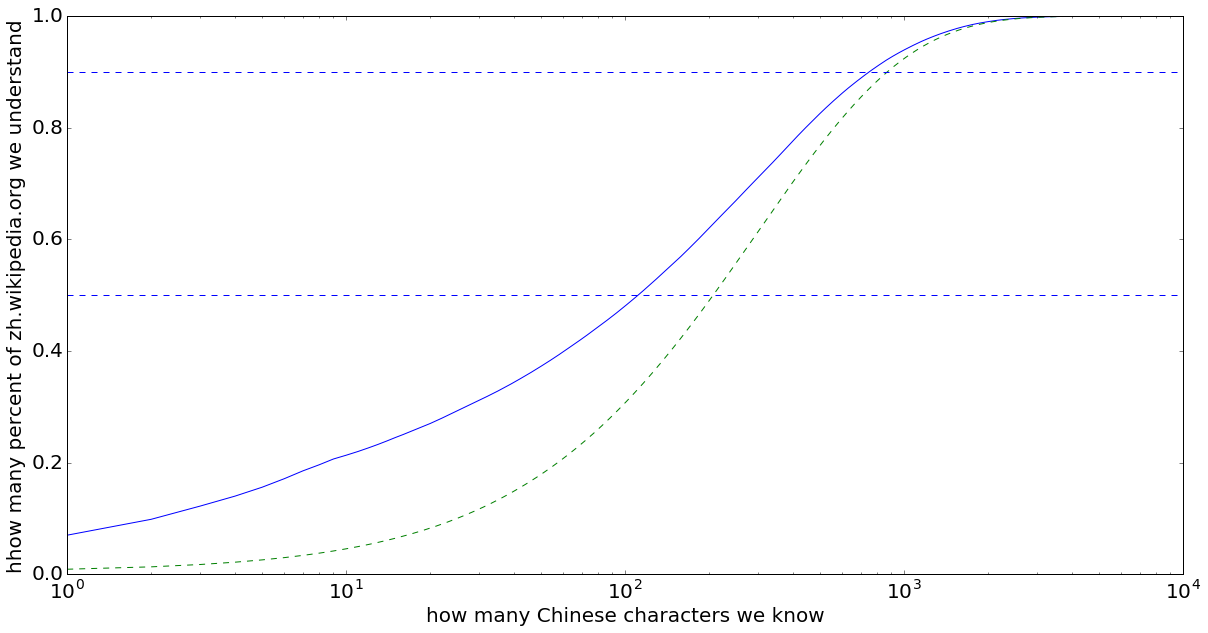

In [201]:
pylab.figure(figsize=(20,10))
pylab.plot(X,np.cumsum(frequencies))
pylab.plot(X,cdf_model(X,*popt_p),ls='--')
pylab.semilogx()
pylab.xlabel('how many Chinese characters we know')
pylab.ylabel('hhow many percent of zh.wikipedia.org we understand')
pylab.axhline(0.5,ls='--')
pylab.axhline(0.9,ls='--')
pylab.ylim(0,1)

## Exercicse

---

We want to improve the fit of our model to the data. To do this, we are going to fit a different curve to the most common words.

* Create a dataset of the 1000 most common characters in our dataset.
* Make a plot of the resulting dataset.
* Write a function of the form ... to fit to the dataset.
* Use scipy.optimize.curve_fit to fit the model to the data.
* Plot the resulting curve with the original data.
---

### Hints

---

* In numpy, you can use `X[:1000]` to get the first 1000 elements of a list.
* As starting parameters, you can use `[..,..,..]`

---

## More questions that we'll try to answer (without speaking a word of Chinese!)

* Which of those characters are words on their own, and which are part of a word?
* How does the number of distinct characters vary from page to page?
* Which pages are probably related, given the characters that appear in them?

# Which character sequences are words?

Now that we know which characters occur most frequently, let's try to find out which ones of them make up words. Chinese has about 1500 syllables ([1],[2]), which means that there are far more words with two or more syllables than with a single syllable. However, about 50 - 70 % of words in common texts are mono-syllabic, whereas 30 % are di-syllabic and only 1-5 % have more than two syllables ([3]).


[1]: https://en.wikipedia.org/wiki/Standard_Chinese_phonology
[2]: http://chinese.stackexchange.com/questions/14596/how-many-syllables-does-chinese-have
[3]: http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0138567

### Let's try to find out which character combinations make up words!

In [202]:
#we join the whole text together
full_text = ' '.join([item['text'] for item in items])
#we generate the bigram distribution
bigram_distribution = get_ngram_distribution(full_text,2)

In [203]:
#we plot the 100 most frequent bigrams in the text
top_100_bigrams=sorted(bigram_distribution.items(), key=lambda x: -x[1])[:100]
print '\n'.join([u'{}: {}'.format(''.join(c[0]),c[1]) for c in top_100_bigrams])

一页: 132146
下一: 66297
上一: 66194
中国: 23320
发展: 13418
经济: 8485
国家: 7907
人民: 7838
我们: 6740
工作: 6054
社会: 5766
问题: 5729
近平: 4992
网络: 4940
习近: 4933
国际: 4805
创新: 4712
一个: 4678
历史: 4665
，中: 4525
建设: 4500
合作: 4500
改革: 4408
南海: 4310
重要: 4212
。”: 4031
主义: 4025
仲裁: 4009
安全: 3972
世界: 3940
”，: 3908
领导: 3800
分享: 3602
美国: 3529
，在: 3520
国内: 3393
党的: 3383
企业: 3367
中央: 3324
互联: 3237
，是: 3197
政府: 3166
政治: 3164
，我: 3155
”。: 3142
，不: 3124
关系: 3047
联网: 3040
坚持: 3001
群众: 2965
，这: 2906
全国: 2838
干部: 2799
记者: 2775
更多: 2752
实现: 2746
”的: 2745
通过: 2740
会议: 2712
的“: 2710
研究: 2691
，也: 2663
来，: 2632
就是: 2580
　　: 2575
没有: 2556
解决: 2552
文化: 2535
国的: 2476
——: 2473
我国: 2470
战略: 2460
完成: 2449
思想: 2449
制度: 2433
技术: 2427
精神: 2409
组织: 2390
信息: 2389
，“: 2382
服务: 2369
推进: 2346
书记: 2344
克强: 2341
方面: 2332
日，: 2322
北京: 2299
李克: 2294
民族: 2291
政策: 2286
增长: 2276
进行: 2260
成为: 2256
共同: 2248
市场: 2247
推动: 2241
说，: 2225
的重: 2161
表示: 2152
国人: 2141


## Exercise 1.3

---

Print the 100 most frequently occurring trigrams.

---

### Question 1: Which character sequences are words?

To work this out, we can make use of some statistics!

From our earlier analysis, we know the empirical frequency of each character in the text. If two characters are forming a word, we can assume that the frequency of seeing them together is much higher than seeing both characters on their own. What makes things complicated though is that many characters can form a single word on their own but also appear in conjunction with other characters to form a different word or expression.

So, to get a better idea of this, let's first plot the frequency of a given bigram, divided by the frequencies of each of the characters in the bigram.

## Exercise

---

* Plot the frequencies of the bigrams over the product of the frequencies of the individual characters
* Try to find a good cutoff that we can use to distinguish single-character words from multi-character words

---

## How does the number of characters vary from page to page?

Now let's have a look how the number and frequency of characters varies from page to page. This information can help us to spot pages that might be easier to understand for beginners, and pages that we should probably avoid...

## Exercise

---

* Generate the distribution of the number of distict characters in each article.
* Find the articles that contain the least and the most distinct characters.
* Based on the set of distinct characters, find the two articles that are most similar to each other.

---

## Which pages are probably related, given the characters in them?

As a final exercise, we are going to build a classifier that tries to categorize a given page using the character information that we find on it.

In [204]:
category_frequencies = defaultdict(lambda:0)
for i,item in enumerate(items):
    for category in item['categories']:
        category_frequencies[category]+=1
top_10_categories = sorted(category_frequencies.items(),key=lambda x:-x[1])[:10]
print u"\n".join([u"{} ({})".format(category,frequency) for category,frequency in top_10_categories])

中国频道 (2843)
要闻 (1888)
理论 (351)
评论 (313)
专题 (199)
分析评论 (190)
媒体聚集 (149)
总理 (126)
中国南海 (108)
媒体聚焦 (56)


## Translations for the most common categories (courtesy Google Translate)

Wikipedia:

* 页面分类: Category Page
* 世界之最: Highest in the world
* 時尚界人物: Fashion & People
* 模特兒: Model (?)
* 時尚: Mode
* 維基百科請求: Wikipedia Request
* 维基百科维护: Wikipedia Maintenance
* 管理员积压工作: Administrative Section
* 在世人物: People's life
* 東京都出身人物: Person Born in Tokyo

China Daily:

* 中国频道: Chinese Channel
* 要闻: Breaking News
* 理论: Theory
* 评论: Review
* 专题: Special Issue
* 分析评论: Comment Analysis
* 媒体聚集: Media Focus
* 总理: Prime Minister
* 中国南海: South Chinese Sea
* 媒体聚焦: Media Focus (again)

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

## Text Vectorization

To perform machine learning on our text data, we need a way to generate feature vectors from the raw text. A popular method for doing so is count-vectoriaztion and TF-ID (term-frequency times inverse document-frequency [1]), which performs a weighing of each character by the inverse frequency with which it occurs in all documents. This is useful as it reduced the weight of characters that are ubiquitous in our data set (and which therefore do not contribute much information).

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

In [338]:
import random
vectorizer = TfidfVectorizer(max_df=0.5, max_features=500,
                                 min_df=2, stop_words=None,
                                 use_idf=True)

def remove_category_names(text,categories):
    transformed_text = text
    for category in categories:
        for character in category:
            transformed_text = transformed_text.replace(character,'')
    return transformed_text

top_10_categories_set = set([c[0] for c in top_10_categories[2:]])
#we assign labels to the categories
top_10_categories_labels = {category : i for i, category in enumerate(top_10_categories_set)}
relevant_items = [(item,(set(item['categories']) & top_10_categories_set).pop()) for item in items if len(set(item['categories']) & top_10_categories_set)]
random.shuffle(relevant_items)
X = vectorizer.fit_transform([remove_category_names(item[0]['text'],item[0]['categories']) for item in relevant_items])
Y = np.array([top_10_categories_labels[item[1]] for item in relevant_items])

In [339]:
from sklearn.cross_validation import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.83)

In [340]:
#http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
trainX_tfid = tfidf_transformer.fit_transform(trainX)
testX_tfid = tfidf_transformer.fit_transform(testX)

In [341]:
from sklearn.naive_bayes import MultinomialNB

In [342]:
clf = MultinomialNB().fit(trainX_tfid, trainY)

In [347]:
predictY = clf.predict(testX_tfid)
print predictY[:20],testY[:20]

[4 0 6 4 4 4 4 6 5 0 0 6 5 4 6 0 6 4 4 4] [4 0 6 1 0 3 4 1 5 0 0 4 5 4 6 0 4 3 3 4]


In [348]:
import sklearn.metrics as metrics
print "Prediction accuracy: {:.2f}%!".format(metrics.accuracy_score(testY,predictY)*100)

Prediction accuracy: 51.85%!


In [349]:
print metrics.confusion_matrix(testY,predictY)

[[ 62   0   0  12   0   4]
 [  4  12   0  44   2  75]
 [  0   0  12  74   0   5]
 [  0   3   5 159   2  53]
 [  0   0   0  33  41  30]
 [  0   4   0  27   0 120]]


# Further Exercices

---

* Write a crawler for another Chinese website and run it to gather some data
* Use the crawled data to perform the analyses that we did above (and possibly some others)
* Load the classical Chinese text by Zhang Dai (a Ming dynasty writer who lived 1597-1689), which you can find in 'western-lake.txt', and perform the same analyses as above on it. Analyze the difference to a contemporary text.

---
